# Representación del Modelo

## Objetivos
En éste ejercicio:
- Aprenderás a implementar el modelo $f_{w,b}$ para Regresión Lineal con una variable.

## Notación Algebraica
Aquí está el resumen de algunas de las notaciones algebraicas que usaremos.

| Notación | Descripción | Python (si aplica) |
|:---------|:------------|:------------------|
| $a$ | Escalar, sin negrilla | — |
| $\mathbf{a}$ | Vector, negrilla | — |
| **Regresión** | **—** | **—** |
| $\mathbf{x}$ | Características del Ejemplo de Entrenamiento (ej.: Tamaño en 1000 m²) | `x_train` |
| $\mathbf{y}$ | Objetivos del Ejemplo de Entrenamiento (en este caso: Precio en 1000s de dólares) | `y_train` |
| $x^{(i)},\ y^{(i)}$ | $i_{th}$ o $i$-ésimo Ejemplo de Entrenamiento | `x_i`, `y_i` |
| $m$ | Número de Ejemplos de Entrenamiento | `m` |
| $w$ | Parámetro: peso/weight | `w` |
| $b$ | Parámetro: sesgo/bias | `b` |
| $f_{w,b}(x^{(i)})$ | El resultado del modelo de evaluación en $x^{(i)}$ parametrizado por $w,b$ : $f_{w,b}(x^{(i)}) = wx^{(i)} + b$ | `f_wb` |



## Herramientas
En éste ejercicio haremos uso de: 
- NumPy, una librería de python muy popular en ciencias de la computación
- Matplotlib, una librería de python muy popular para imprimir/plot datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle') # estilo para imprimir datos

# Enunciado del Problema
Como en la clase, usarás el ejemplo de predicción del precio de viviendas.  
Este laboratorio utilizará un conjunto de datos simple con solo dos datos: una casa de 100 metros cuadrados se vendió por \\$300,000 y otra de 200 metros cuadrados se vendió por \\$500,000. Estos dos datos constituirán nuestro *conjunto de datos o de entrenamiento*. En este ejercicio, las unidades de tamaño están en cientos de metros cuadrados (1000 m²) y el precio en miles 1000s de dólares.

| Tamaño (1000 m²)   | Precio (miles de dólares) |
|--------------------|---------------------------|
| 1.0                | 300                       |
| 2.0                | 500                       |

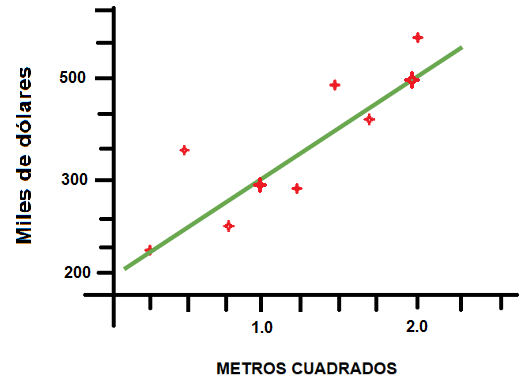

Se desea ajustar un modelo de regresión lineal (representado arriba como una línea recta verde) a través de estos dos datos, para luego poder predecir el precio de otras viviendas, por ejemplo, una casa de 1200 m².



Please run the following code cell to create your `x_train` and `y_train` variables. The data is stored in one-dimensional NumPy arrays.

In [ ]:
# x_train es la variable de entrada (tamaño en 1000 metros cuadrados)
# y_train es el objetivo (precio en 1000s de dólares)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

>**Nota**: El curso utilizará frecuentemente el formato de salida *f-string* de Python descrito [aquí](https://docs.python.org/3/tutorial/inputoutput.html) al imprimir. El contenido entre llaves se evalúa al generar la salida.

### Número de ejemplos de entrenamiento `m`
Se usará `m` para denotar el número de ejemplos de entrenamiento.  
Los arreglos de Numpy tienen un parámetro `.shape`.  
`x_train.shape` devuelve una tupla de Python con una entrada por cada dimensión.  
`x_train.shape[0]` es la longitud del arreglo y representa el número de ejemplos, como se muestra a continuación.


In [ ]:
# m es el número de ejemplos de entrenamiento
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

También se puede utilizar la función `len()` de Python, como se muestra a continuación.

In [ ]:
# m es el número de ejemplos de entrenamiento
m = len(x_train)
print(f"Number of training examples is: {m}")

### Ejemplo de entrenamiento `x_i, y_i`

Se utilizará (x$^{(i)}$, y$^{(i)}$) para denotar el $i^{th}$ o $i$-ésimo ejemplo de entrenamiento.  
Dado que Python comienza la indexación en cero, (x$^{(0)}$, y$^{(0)}$) es (1.0, 300.0) y (x$^{(1)}$, y$^{(1)}$) es (2.0, 500.0).

Para acceder a un valor en un arreglo de Numpy, se indexa el arreglo con el desplazamiento deseado.  
Por ejemplo, la sintaxis para acceder a la posición cero de `x_train` es `x_train[0]`.

Ejecuta la siguiente celda de código para obtener el $i$-ésimo ejemplo de entrenamiento.


In [ ]:
i = 0 # Cambia éste valor a 1 para ver (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

### Graficar/plotting los datos

Puedes graficar estos dos puntos usando la función `scatter()` de la biblioteca `matplotlib`, como se muestra en la celda siguiente.  
- Los argumentos de la función `marker` y `c` muestran los puntos como cruces rojas (el valor predeterminado son puntos azules).

También puedes usar otras funciones de la biblioteca `matplotlib` para establecer el título y las etiquetas que se mostrarán.

In [ ]:
# Graficar/Plot los datos
plt.scatter(x_train, y_train, marker='x', c='r')
# Crea el título
plt.title("Precios de las casas")
# Crea el nombre del eje-y
plt.ylabel('Precio (en 1000s de dólares)')
# Crea el nombre del eje-x
plt.xlabel('Tamaño (1000 m2)')
plt.show()

## Función del modelo

Como se explicó en clase, la función del modelo para regresión lineal (es decir, una función que mapea de `x` a `y`) se representa como

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

La fórmula anterior es una forma de representar líneas rectas: diferentes valores de $w$ y $b$ generan distintas líneas rectas en el gráfico.  

Vamos a intentar obtener una mejor intuición sobre esto con los bloques de código a continuación. Comencemos con $w = 100$ y $b = 100$.

**Nota: Puedes volver a la siguiente celda para ajustar los parámetros `w` y `b` del modelo.**

In [ ]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

Ahora calculemos el valor de $f_{w,b}(x^{(i)})$ para tus dos puntos de datos. Puedes escribir esto explícitamente para cada punto así:

para $x^{(0)}$, `f_wb = w * x[0] + b`

para $x^{(1)}$, `f_wb = w * x[1] + b`

Para un número grande de puntos de datos, esto puede volverse poco manejable y repetitivo. Por eso, puedes calcular la salida de la función dentro de un ciclo `for`, como se muestra en la función `compute_model_output` más abajo.

> **Nota**: La descripción del argumento `(ndarray (m,))` indica un arreglo N-dimensional de Numpy con forma (m,). `(scalar)` describe un argumento sin dimensiones, es decir, solo una magnitud.  
> **Nota**: `np.zeros(n)` devuelve un arreglo unidimensional de Numpy con $n$ elementos.


In [ ]:
def compute_model_output(x, w, b):
    """
    Calcula la predicción de un modelo lineal
    Args:
      x (ndarray (m,)): Datos, m ejemplos 
      w,b (scalar)    : parametros del modelo  
    Retorna
      f_wb (ndarray (m,)): predicción del modelo
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Ahora llamemos la función `compute_model_output` y graficamos la salida..

In [ ]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Graficar nuestra predicción del modelo
plt.plot(x_train, tmp_f_wb, c='b',label='Nuestra predicción')

# Graficar los datos
plt.scatter(x_train, y_train, marker='x', c='r',label='Valores reales')

# Crea el título
plt.title("Precios de las casas")
# Crea el nombre del eje-y
plt.ylabel('Precio (en 1000s de dólares)')
# Crea el nombre del eje-x
plt.xlabel('Tamaño (1000 m2)')
plt.legend()
plt.show()

Como puedes ver, establecer $w = 100$ y $b = 100$ *no* resulta en una línea que se ajuste a nuestros datos.

### Desafío
Prueba experimentar con diferentes valores de $w$ y $b$. ¿Cuáles deberían ser los valores para una línea que se ajuste bien a nuestros datos?

#### Sugerencia:
Puedes usar el mouse para hacer click en los botones verdes de "Pistas" que aparecen a continuación para revelar algunas sugerencias sobre cómo elegir `b` y `w`.

<details>
<summary>
    <font size='3' color='darkgreen'><b>Pista</b></font>
</summary>
    <p>
    <ul>
        <li>Prueba con $w = 200$ y $b = 100$ </li>
    </ul>
    </p>
</details>

### Predicción
Ahora que tenemos un modelo, podemos usarlo para hacer nuestra predicción original.  
Vamos a predecir el precio de una casa con 1200 metros cuadrados.  
Dado que las unidades de $x$ están en miles de metros cuadrados, entonces $x = 1.2$.

In [3]:
w = 200                         
b = 100    
x_i = 1.2
costo_1200sqm = w * x_i + b    

print(f"${costo_1200sqm:.0f} miles de dólares")

$340 miles de dólares


# ¡Felicidades!
En este laboratorio has aprendido:

 - La regresión lineal construye un modelo que establece una relación entre las características (features) y los objetivos (targets).
     - En el ejemplo anterior, la característica era el tamaño de la casa y el objetivo era el precio de la casa.
     - Para la regresión lineal simple, el modelo tiene dos parámetros, $w$ y $b$, cuyos valores se ajustan usando los *datos de entrenamiento*.
     - Una vez que se han determinado los parámetros del modelo, este se puede usar para hacer predicciones sobre datos nuevos.